### Ford Go Bikes

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.
This data is made freely available by Lyft at the following url:
https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from pyproj import Geod

 ### Aim:
 To compare and contrast between the 2 user types and understand the behaviours of each. To then produce actionable insights to end up with actionable insights to improve both profitability and usage of the bikes

## Gather
-This data set contains details about the last five months of 2017

In [4]:
df = pd.read_csv("2017-fordgobike-tripdata.csv")

In [5]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


The Data
Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### Cleaning
- start time and end time are not in datetime format
- user_type as category,bike_id/start_Station_id/end_station_id as strings
- Then extract months and days and hours into new columns (This is important since we want to understand when it it that people use the service/under what conditions)
- Try to calculate distance between the points

In [9]:
df1 = df.copy()

In [10]:
df1.start_time = pd.to_datetime(df1.start_time)
df1.end_time = pd.to_datetime(df1.end_time)
df1.user_type = df1.user_type.astype('category')
df1.bike_id = df1.bike_id.astype(str)
df1.start_station_id = df1.bike_id.astype(str)
df1.end_station_id = df1.bike_id.astype(str)

In [11]:
df1['month'] = pd.DatetimeIndex(df1['start_time']).month

In [12]:
df1['hour']= df1['start_time'].dt.hour

In [13]:
df1['day']=df1['start_time'].dt.strftime('%a')

In [14]:
df1["user_type"].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [15]:
df1["duration"] = df1["duration_sec"]/60

In [16]:
df1 = df1[df1.month != 6]

In [17]:
df1["month"].value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
Name: month, dtype: int64

In [23]:
## https://stackoverflow.com/questions/44446862/calculate-distance-between-latitude-and-longitude-in-dataframe

wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist

#Create test data
lat1 = np.random.uniform(-90,90,100)
lon1 = np.random.uniform(-180,180,100)
lat2 = np.random.uniform(-90,90,100)
lon2 = np.random.uniform(-180,180,100)

#Package as a dataframe
df = pd.DataFrame({'lat1':lat1,'lon1':lon1,'lat2':lat2,'lon2':lon2})

#Add/update a column to the data frame with the distances (in metres)
df1['dist'] = Distance(df1['start_station_latitude'].tolist(),df1['end_station_longitude'].tolist(),df1['end_station_latitude'].tolist(),df1['end_station_longitude'].tolist())

In [24]:
df1["dist"].describe()

count    517011.000000
mean       1139.657907
std         945.387624
min           0.000000
25%         452.112484
50%         932.527423
75%        1627.237270
max       53561.002946
Name: dist, dtype: float64

### Univariate Exploration

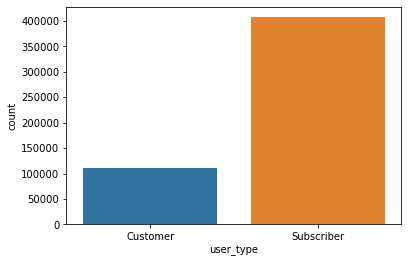

In [33]:
sb.countplot(data=df1,x="user_type");

## Most people who use the service appear to be Subscribers to the service

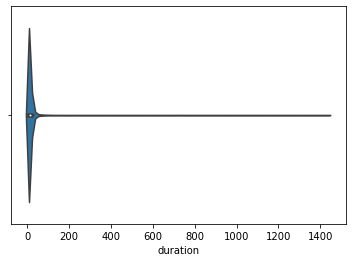

In [34]:
sb.violinplot(data = df1, x = 'duration');

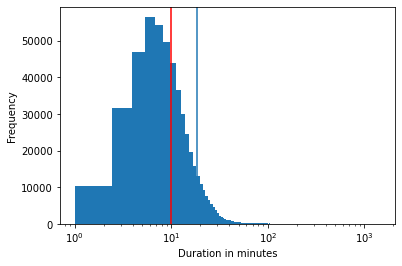

In [35]:
plt.hist(data=df1,x="duration",bins=1000)
plt.axvline(df1["duration"].mean())
plt.axvline(df1["duration"].median(),color='red')
plt.xscale('log')
plt.xlabel("Duration in minutes")
plt.ylabel("Frequency");

In [36]:
df1["duration"].describe()

count    517011.000000
mean         18.319766
std          57.453608
min           1.016667
25%           6.366667
50%           9.933333
75%          15.650000
max        1439.483333
Name: duration, dtype: float64

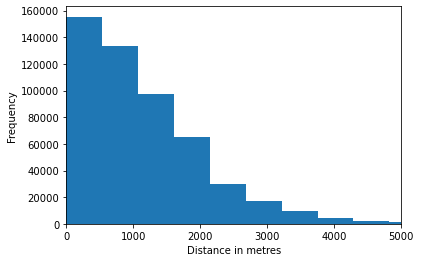

In [37]:
plt.hist(data=df1,x="dist",bins=100)
#plt.xscale('log')
plt.xlim([0,5000])
plt.xlabel("Distance in metres")
plt.ylabel("Frequency");

### This is a zoomed in version. It is clear that most rides are extremely short ie under 500 metres. This suggests people use this for the last mile connectivity 

### Most rides are under 15 minutes long. Most rides are under 15 minutes long suggesting the service is primarily used for shorter commutes

In [38]:
color = sb.color_palette()[0]

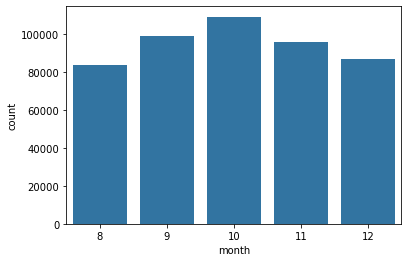

In [39]:
sb.countplot(data = df1, x = 'month', color =color,order=[8,9,10,11,12]);

### There is a drop off in the month of december suggesting the cold weather deters people from using the service

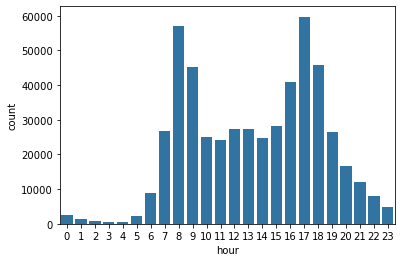

In [40]:
sb.countplot(data = df1, x = 'hour', color =color);

### Most rides occur before and after office hours. This suggests the service is primarily used by employed individuals.

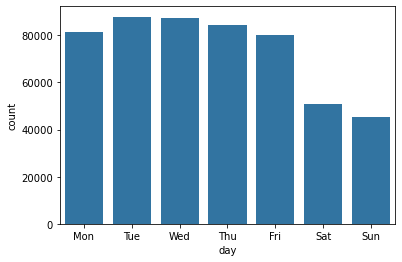

In [41]:
sb.countplot(data = df1, x = 'day', color =color,order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]);

#### The above observation is more obvious since there is a drop off during the weekends

### Bivarient Plots

In [42]:
cust = df1.query('user_type == "Customer"')['bike_id'].count()
sub = df1.query('user_type == "Subscriber"')['bike_id'].count()

cust_prop = cust / df1['bike_id'].count()
sub_prop = sub / df1['bike_id'].count()

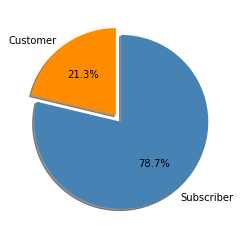

In [43]:
labels = ['Customer', 'Subscriber']
sizes = [cust_prop, sub_prop]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90);

### Most users appear to be subscibers

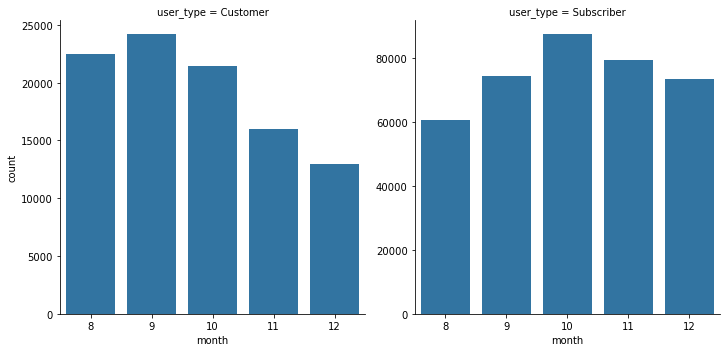

In [44]:
sb.catplot(data=df1, x='month', col="user_type", kind='count', sharey = False,
            color = color,order=[8,9,10,11,12]);

### The most rides seem to occur during the months of August,Sept and October with a sharp dip during the winter among customers. The demand is relatively stable among subscribers across months

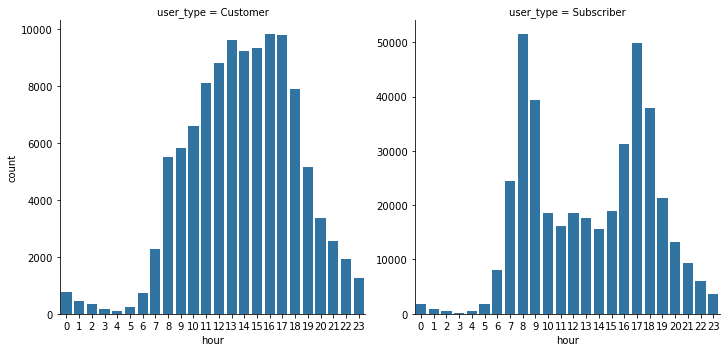

In [45]:
sb.catplot(data=df1, x='hour', col="user_type", kind='count', sharey = False,
            color = color);

### This clearly shows that subscribers utilize the service before/after work. While customers seem to use it during the day. 

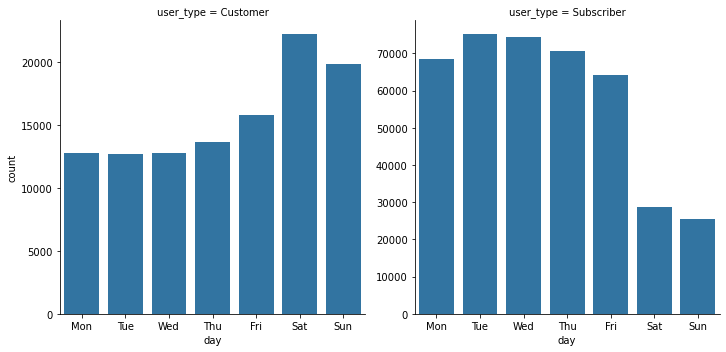

In [46]:
sb.catplot(data=df1, x='day', col="user_type", kind='count', sharey = False,
            color = color,order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]);

### The Customers use the service much more during the weekend. While subscibers utilize it more during the week

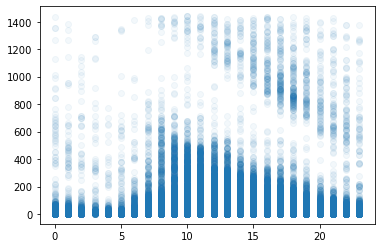

In [50]:
plt.scatter(data=df1, x='hour',y="duration",color = color,alpha=1/20);

### Longer rides seem to occur during the day while more rides occur before/after work hours

### Multivariate Exploration

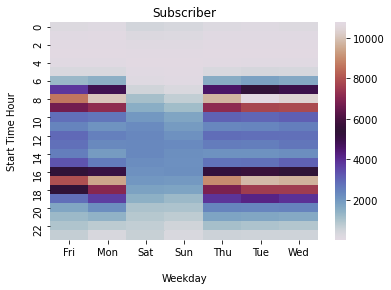

In [51]:
df_subscriber = df1.query('user_type == "Subscriber"').groupby(['hour', 'day'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('hour', 'day', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

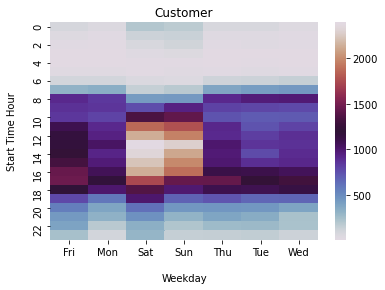

In [57]:
df_customer = df1.query('user_type == "Customer"').groupby(['hour', 'day'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('hour', 'day', 'bike_id')
hot_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title("Customer", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

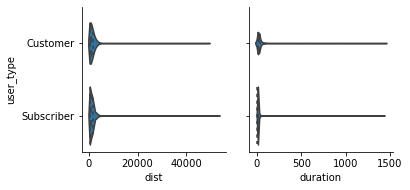

In [63]:
g = sb.PairGrid(data = df1, x_vars = ['dist', 'duration'],
                y_vars = ['user_type'])
g.map(sb.violinplot, inner = 'quartile')

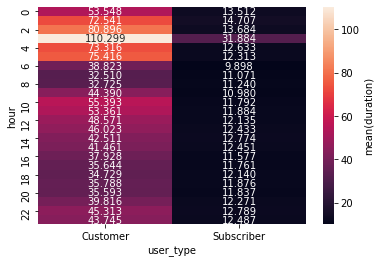

In [66]:
cat_means = df1.groupby(['user_type', 'hour']).mean()['duration']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'hour', columns = 'user_type',
                            values = 'duration_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration)'});

#### Customers take longer rides and hence generate more revenue per ride.
#### Whereas Subscribers generate a smaller but consistent revenue

## Conclusion:

From the plots we conclude:
- A large portion of the users are subscriber
- Subscribers use the bikes maily to commute to/from work
- Customers use it in a more during the day.
- Subscriber use it during the weekday
- Customers use it during weekends
- Customers appear to use it for a longer duration per trip.

### Inferences
- More Customers need to be targeted and acquired since the usage by customers is better during non-pea hours.The bikes being free during the weekends/in the afternoon can be used by aggresively mareting to attract customers/tourists.
- The business is linked to the season since fewer people want to use it in the winter. So a discount can be used to attract customers during these times.